In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))



*** Using device=mps ***

Jupyter=True, MatPlotLib.isinteractive()=False
Unique ID: AMqjDo-zS7mGCURQtmXx6w
PlotVideoMaker: Hyper-Training, auto-save=True
middle-C=261.63 Hz
PlotVideoMaker: STFT_Video, auto-save=True
Using sample rate=44100 Hz, FFT=2048 buckets, hop=1024 samples, duration=2.0 sec = 86 time steps
Max frequency=22050 Hz --> freq_buckets=1025
STFT file already created: STFT 44100 Hz, size=1024, hop=1024.pkl
1 sample = 1,025 x 86 = 88,150
fail_loss=20000, last_saved_loss=10000



Training model AudioConv_AE

last_saved_loss= 5000
Loaded 1017 samples from Audio 44100.pkl
1017 samples
Using train=813 samples, test=204 samples.
train_best_params: AudioConv_AE: [4, -5, 4, 102, 89, 2]
PlotVideoMaker: STFT - train AudioConv_AE, auto-save=True
fail_loss=88200, last_saved_loss=44100
AudioConv_AE layers=4, kernels=102, size=89, compression=2
	layer 1: kernel= 89, stride=44, length=2,003, compression=  44.0x
	layer 2: kernel= 44, stride=22, length=   90, compression=  22.3x
	layer 3




*** Best! loss=7.62, params=[4, -5, 4, 102, 89, 2]
	AudioConv_AE layers=4, kernels=102, size=89, compression=2 (params=1,537,855, compression=864.7x)
	Adam batch=16, learning_rate=0.00016, weight_decay=0


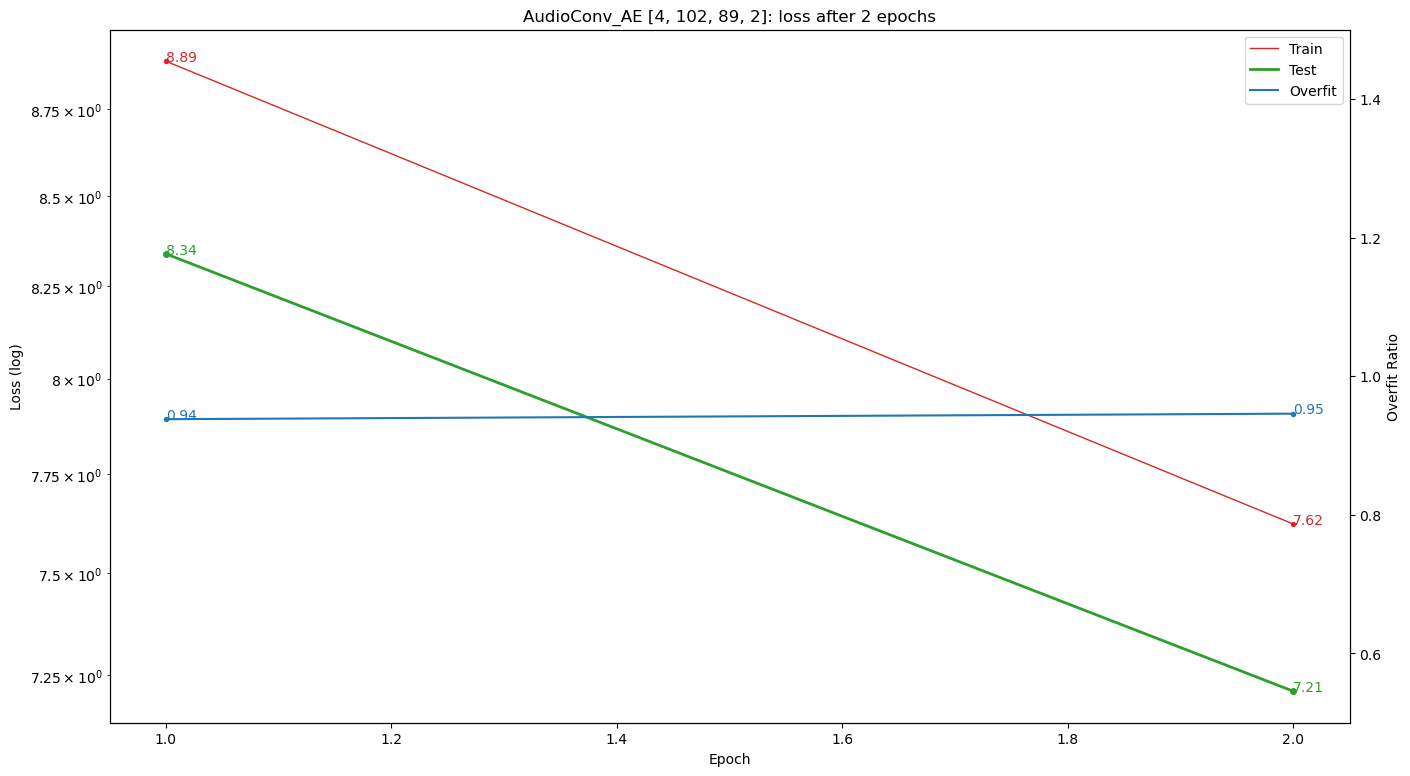

total=7.1 sec, epoch=2 (3.6 sec/epoch), train=7.62 (-14.25%), test=7.21 (-13.52%), overfit=0.95

*** Best! loss=6.90, params=[4, -5, 4, 102, 89, 2]
	AudioConv_AE layers=4, kernels=102, size=89, compression=2 (params=1,537,855, compression=864.7x)
	Adam batch=16, learning_rate=0.00016, weight_decay=0


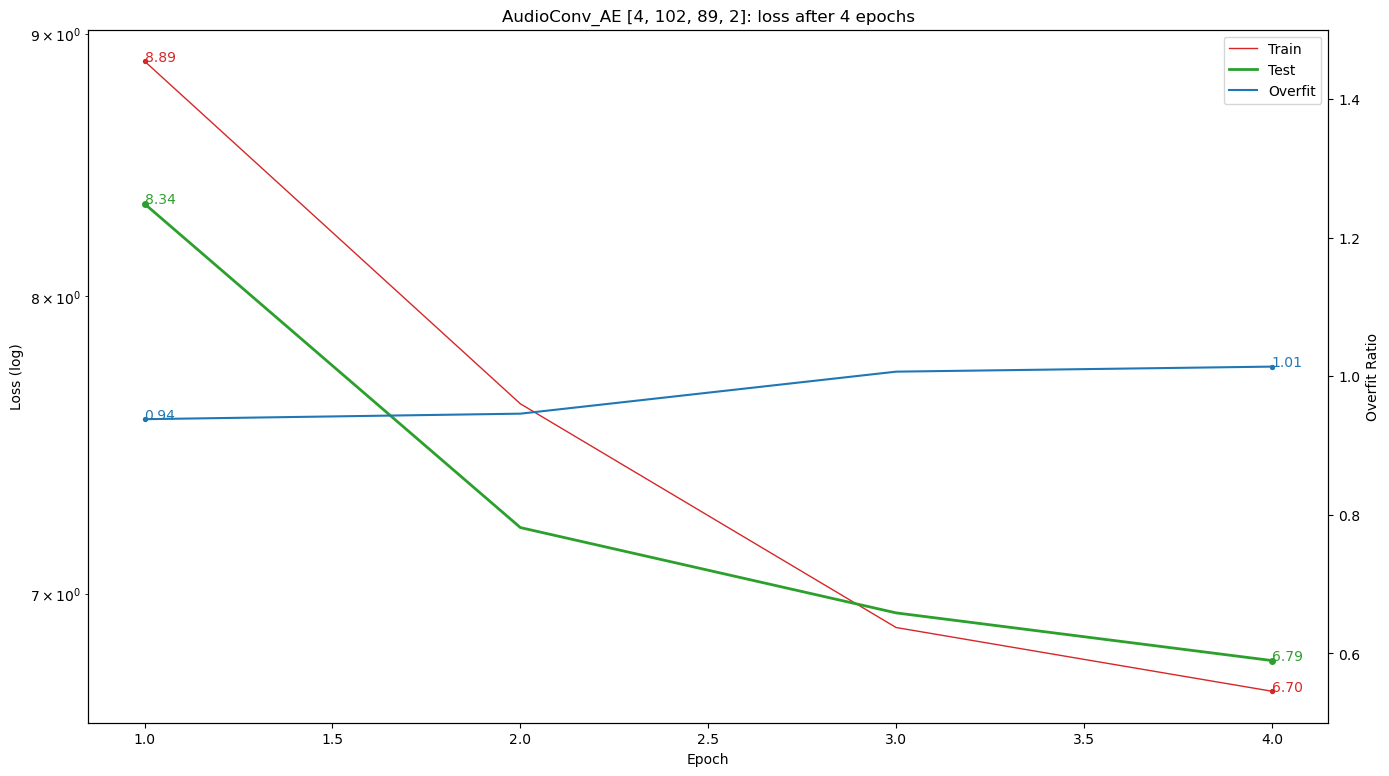

total=14.2 sec, epoch=4 (3.5 sec/epoch), train=6.70 (-12.10%), test=6.79 (-5.79%), overfit=1.01

*** Best! loss=6.46, params=[4, -5, 4, 102, 89, 2]
	AudioConv_AE layers=4, kernels=102, size=89, compression=2 (params=1,537,855, compression=864.7x)
	Adam batch=16, learning_rate=0.00016, weight_decay=0




total=21.0 sec, epoch=6 (3.5 sec/epoch), train=6.46 (-3.66%), test=6.57 (-3.36%), overfit=1.02


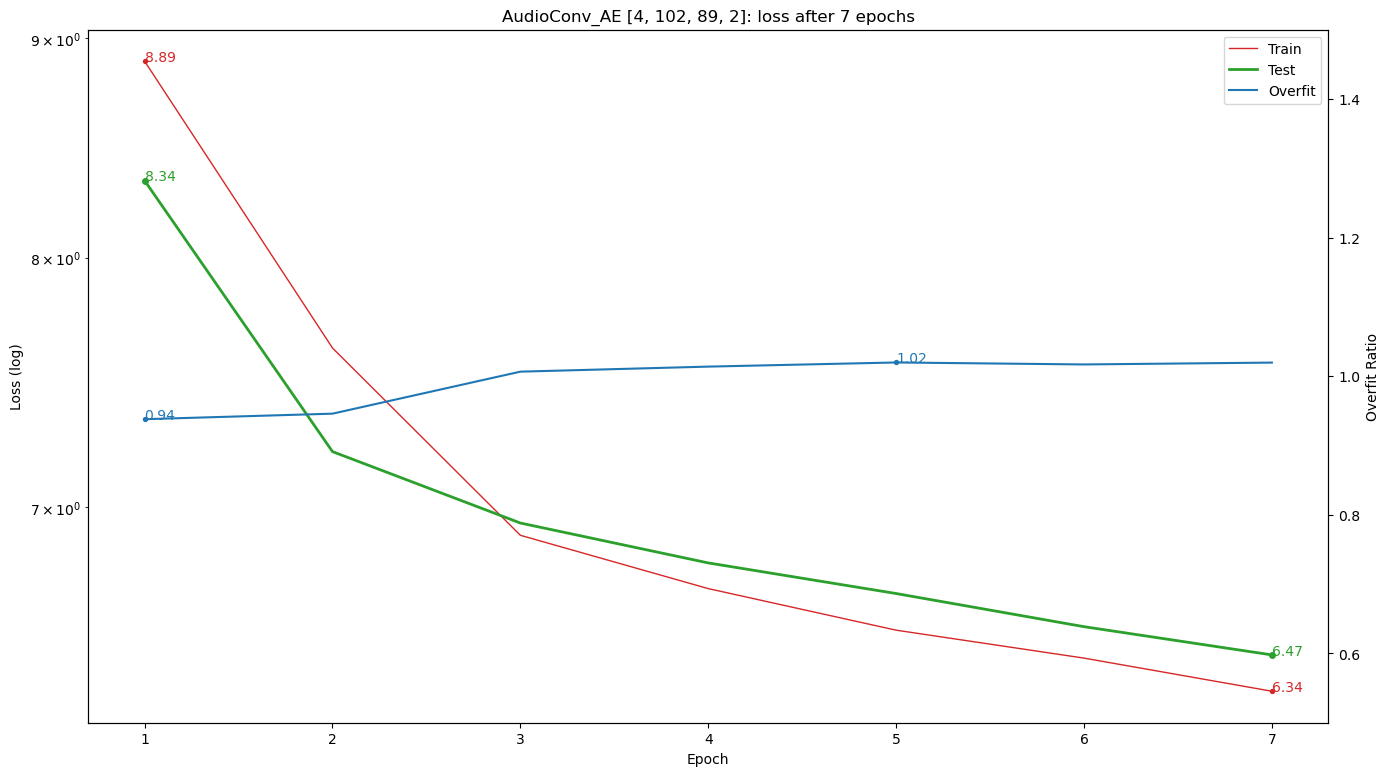

total=27.9 sec, epoch=8 (3.5 sec/epoch), train=6.27 (-2.88%), test=6.40 (-2.59%), overfit=1.02
total=34.5 sec, epoch=10 (3.4 sec/epoch), train=6.14 (-2.05%), test=6.28 (-1.87%), overfit=1.02

*** Best! loss=6.11, params=[4, -5, 4, 102, 89, 2]
	AudioConv_AE layers=4, kernels=102, size=89, compression=2 (params=1,537,855, compression=864.7x)
	Adam batch=16, learning_rate=0.00016, weight_decay=0


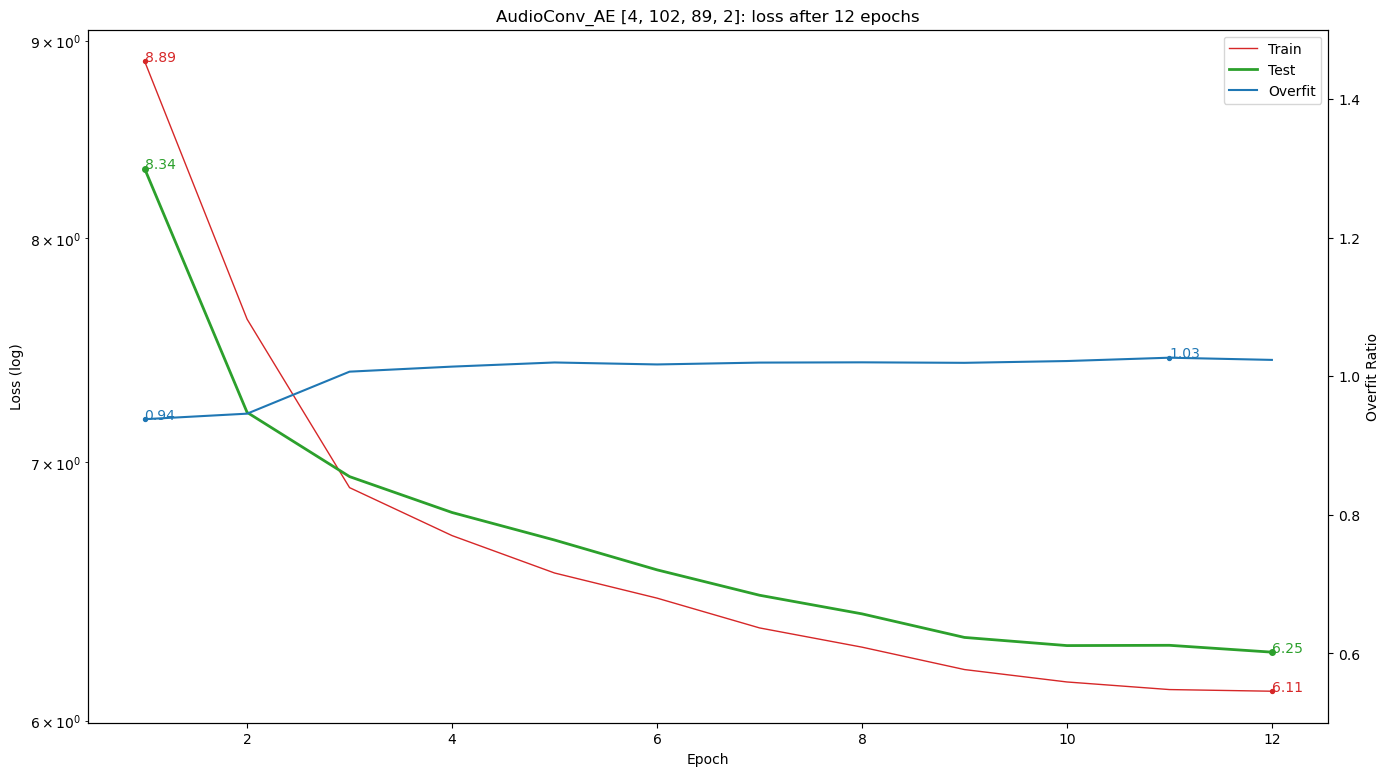

total=41.1 sec, epoch=12 (3.4 sec/epoch), train=6.11 (-0.55%), test=6.25 (-0.39%), overfit=1.02
total=47.9 sec, epoch=14 (3.4 sec/epoch), train=6.03 (-1.19%), test=6.16 (-1.50%), overfit=1.02

*** Best! loss=5.69, params=[4, -5, 4, 102, 89, 2]
	AudioConv_AE layers=4, kernels=102, size=89, compression=2 (params=1,537,855, compression=864.7x)
	Adam batch=16, learning_rate=0.00016, weight_decay=0




total=54.5 sec, epoch=16 (3.4 sec/epoch), train=5.69 (-5.77%), test=5.66 (-8.03%), overfit=1.00

*** Best! loss=5.37, params=[4, -5, 4, 102, 89, 2]
	AudioConv_AE layers=4, kernels=102, size=89, compression=2 (params=1,537,855, compression=864.7x)
	Adam batch=16, learning_rate=0.00016, weight_decay=0





*** Best! loss=5.07, params=[4, -5, 4, 102, 89, 2]
	AudioConv_AE layers=4, kernels=102, size=89, compression=2 (params=1,537,855, compression=864.7x)
	Adam batch=16, learning_rate=0.00016, weight_decay=0




total=61.2 sec, epoch=18 (3.4 sec/epoch), train=5.07 (-10.79%), test=5.32 (-6.09%), overfit=1.05


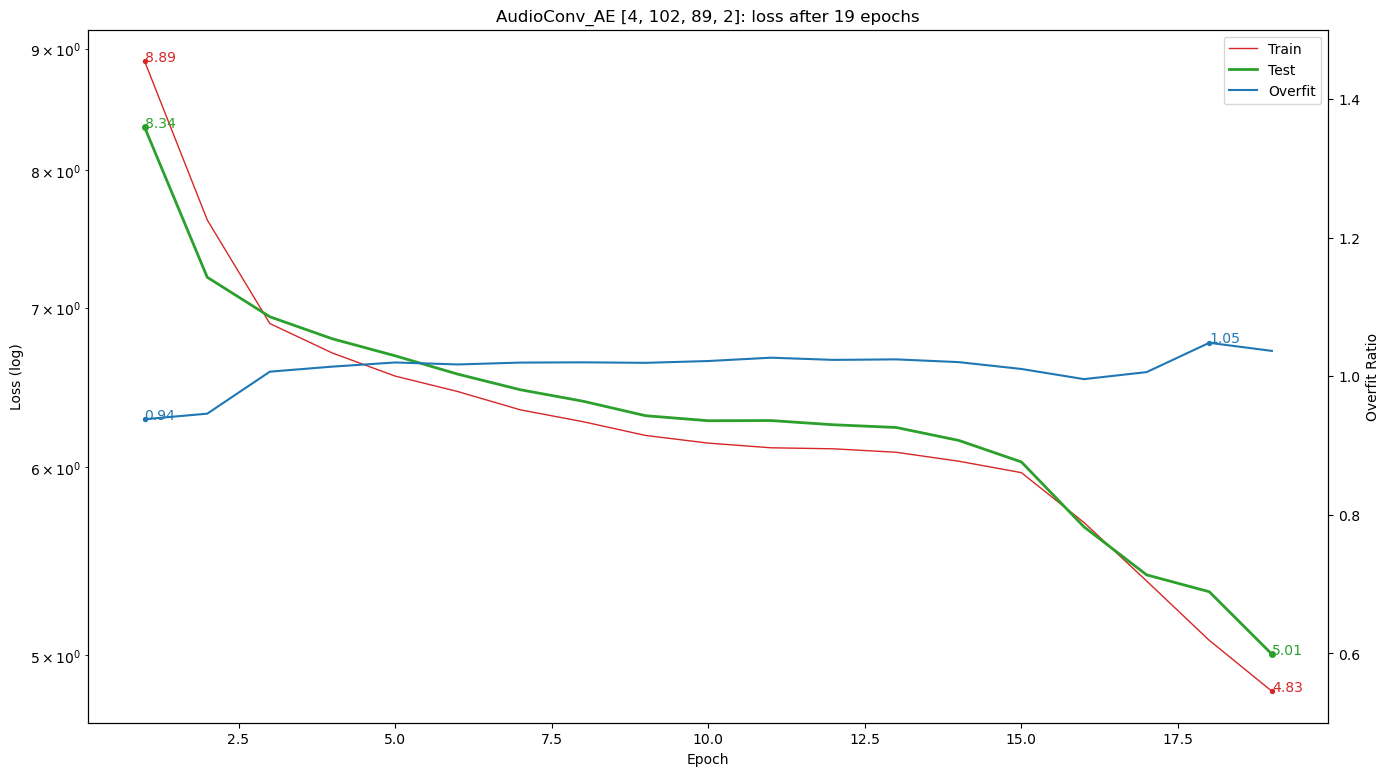


*** Best! loss=4.55, params=[4, -5, 4, 102, 89, 2]
	AudioConv_AE layers=4, kernels=102, size=89, compression=2 (params=1,537,855, compression=864.7x)
	Adam batch=16, learning_rate=0.00016, weight_decay=0




total=68.2 sec, epoch=20 (3.4 sec/epoch), train=4.55 (-10.35%), test=5.01 (-5.86%), overfit=1.10
total=74.9 sec, epoch=22 (3.4 sec/epoch), train=4.39 (-3.39%), test=4.75 (-5.14%), overfit=1.08

*** Best! loss=4.23, params=[4, -5, 4, 102, 89, 2]
	AudioConv_AE layers=4, kernels=102, size=89, compression=2 (params=1,537,855, compression=864.7x)
	Adam batch=16, learning_rate=0.00016, weight_decay=0




total=81.6 sec, epoch=24 (3.4 sec/epoch), train=4.16 (-5.24%), test=4.55 (-4.25%), overfit=1.09
total=88.2 sec, epoch=26 (3.4 sec/epoch), train=4.06 (-2.52%), test=4.47 (-1.61%), overfit=1.10

*** Best! loss=3.98, params=[4, -5, 4, 102, 89, 2]
	AudioConv_AE layers=4, kernels=102, size=89, compression=2 (params=1,537,855, compression=864.7x)
	Adam batch=16, learning_rate=0.00016, weight_decay=0




total=94.9 sec, epoch=28 (3.4 sec/epoch), train=3.94 (-2.99%), test=4.41 (-1.46%), overfit=1.12


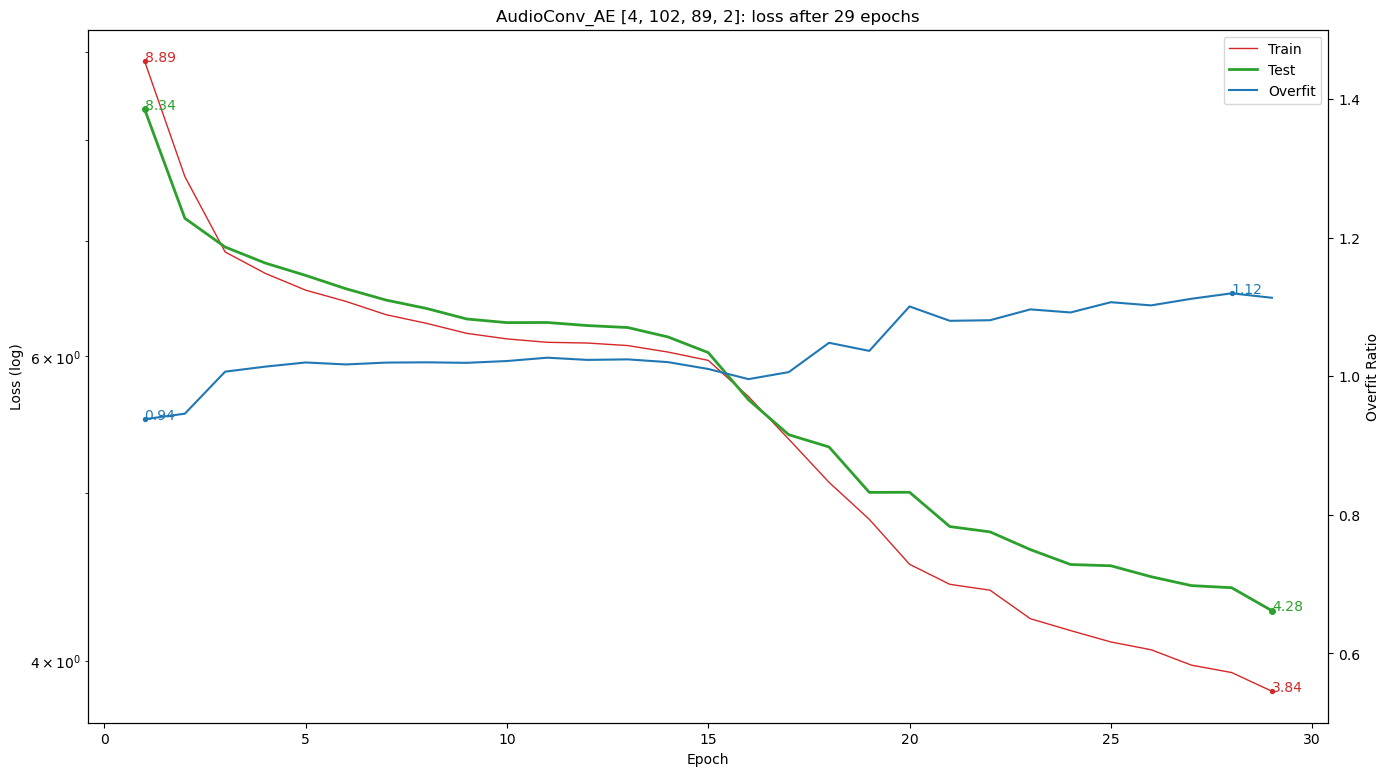


*** Best! loss=3.61, params=[4, -5, 4, 102, 89, 2]
	AudioConv_AE layers=4, kernels=102, size=89, compression=2 (params=1,537,855, compression=864.7x)
	Adam batch=16, learning_rate=0.00016, weight_decay=0




total=101.7 sec, epoch=30 (3.4 sec/epoch), train=3.61 (-8.23%), test=4.06 (-8.00%), overfit=1.12

*** Best! loss=3.38, params=[4, -5, 4, 102, 89, 2]
	AudioConv_AE layers=4, kernels=102, size=89, compression=2 (params=1,537,855, compression=864.7x)
	Adam batch=16, learning_rate=0.00016, weight_decay=0




total=108.4 sec, epoch=32 (3.4 sec/epoch), train=3.38 (-6.43%), test=3.91 (-3.49%), overfit=1.16
total=115.0 sec, epoch=34 (3.4 sec/epoch), train=3.25 (-3.73%), test=3.78 (-3.42%), overfit=1.16

*** Best! loss=3.16, params=[4, -5, 4, 102, 89, 2]
	AudioConv_AE layers=4, kernels=102, size=89, compression=2 (params=1,537,855, compression=864.7x)
	Adam batch=16, learning_rate=0.00016, weight_decay=0




total=121.7 sec, epoch=36 (3.4 sec/epoch), train=3.12 (-4.21%), test=3.70 (-2.10%), overfit=1.19
total=128.3 sec, epoch=38 (3.4 sec/epoch), train=3.06 (-1.79%), test=3.66 (-1.07%), overfit=1.20
total=134.9 sec, epoch=40 (3.4 sec/epoch), train=3.03 (-1.06%), test=3.68 (0.39%), overfit=1.21

*** Best! loss=3.00, params=[4, -5, 4, 102, 89, 2]
	AudioConv_AE layers=4, kernels=102, size=89, compression=2 (params=1,537,855, compression=864.7x)
	Adam batch=16, learning_rate=0.00016, weight_decay=0




total=141.5 sec, epoch=42 (3.4 sec/epoch), train=3.00 (-1.12%), test=3.63 (-1.15%), overfit=1.21


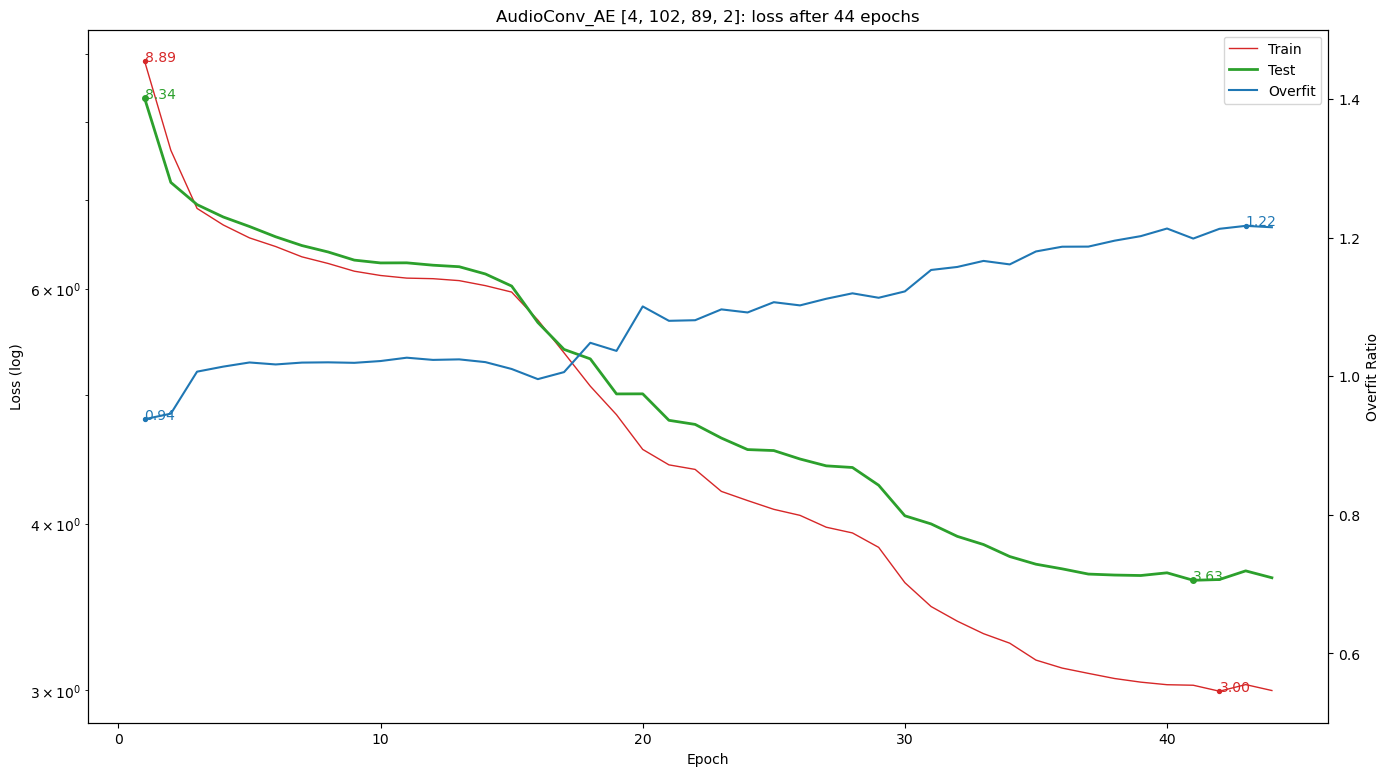

total=148.1 sec, epoch=44 (3.4 sec/epoch), train=3.00 (0.12%), test=3.64 (0.31%), overfit=1.21
total=154.9 sec, epoch=46 (3.4 sec/epoch), train=2.98 (-0.66%), test=3.60 (-1.31%), overfit=1.21
total=161.6 sec, epoch=48 (3.4 sec/epoch), train=2.90 (-2.84%), test=3.55 (-1.19%), overfit=1.23
total=168.2 sec, epoch=50 (3.4 sec/epoch), train=2.86 (-1.38%), test=3.52 (-0.99%), overfit=1.23
total=174.8 sec, epoch=52 (3.4 sec/epoch), train=2.85 (-0.02%), test=3.55 (0.96%), overfit=1.24

*** Best! loss=2.85, params=[4, -5, 4, 102, 89, 2]
	AudioConv_AE layers=4, kernels=102, size=89, compression=2 (params=1,537,855, compression=864.7x)
	Adam batch=16, learning_rate=0.00016, weight_decay=0




total=181.6 sec, epoch=54 (3.4 sec/epoch), train=2.84 (-0.57%), test=3.60 (1.30%), overfit=1.27
total=188.2 sec, epoch=56 (3.4 sec/epoch), train=2.83 (-0.19%), test=3.58 (-0.64%), overfit=1.26
total=194.8 sec, epoch=58 (3.4 sec/epoch), train=2.76 (-2.46%), test=3.55 (-0.78%), overfit=1.28
total=201.4 sec, epoch=60 (3.4 sec/epoch), train=2.80 (1.42%), test=3.64 (2.57%), overfit=1.30
total=208.1 sec, epoch=62 (3.4 sec/epoch), train=2.74 (-2.16%), test=3.54 (-2.62%), overfit=1.29

*** Best! loss=2.69, params=[4, -5, 4, 102, 89, 2]
	AudioConv_AE layers=4, kernels=102, size=89, compression=2 (params=1,537,855, compression=864.7x)
	Adam batch=16, learning_rate=0.00016, weight_decay=0




total=214.8 sec, epoch=64 (3.4 sec/epoch), train=2.67 (-2.56%), test=3.50 (-1.36%), overfit=1.31


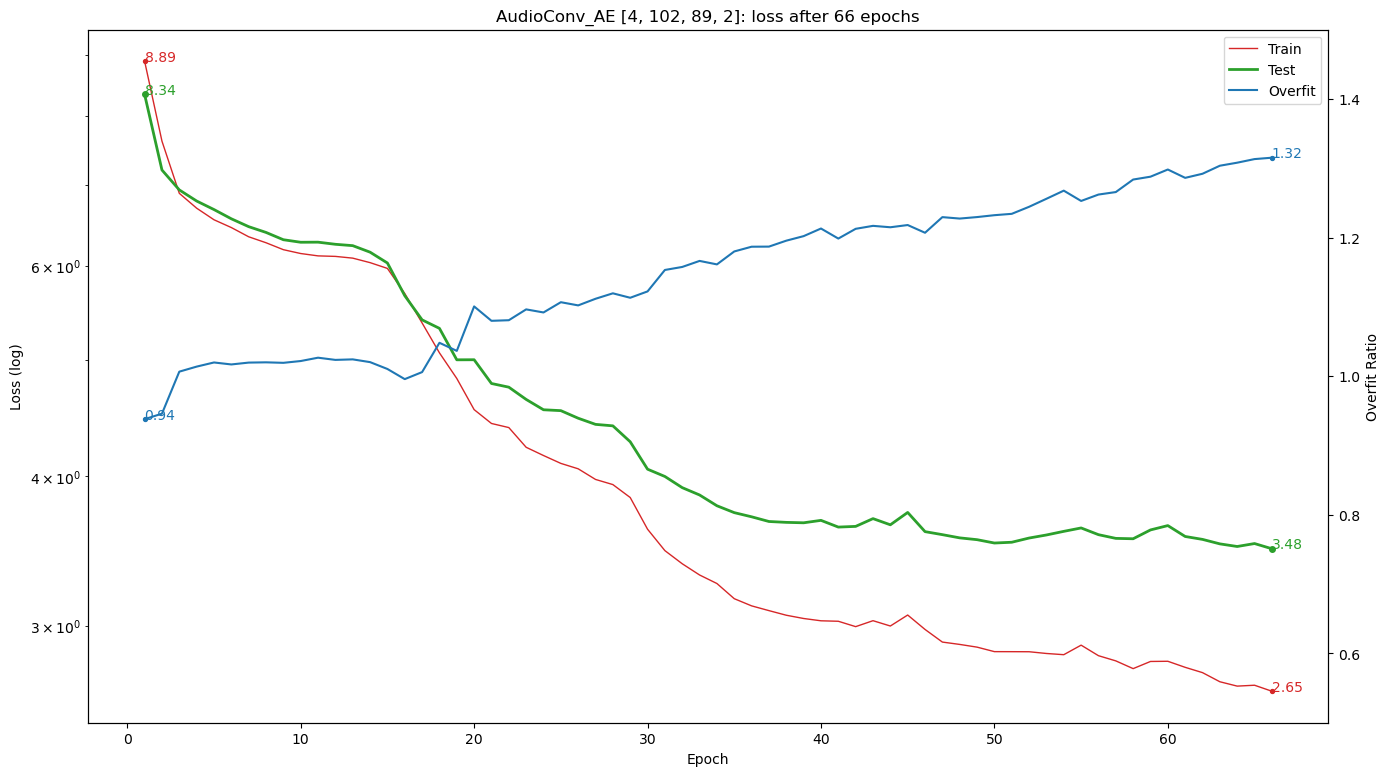

total=221.4 sec, epoch=66 (3.4 sec/epoch), train=2.65 (-0.98%), test=3.48 (-0.43%), overfit=1.32
total=228.3 sec, epoch=68 (3.4 sec/epoch), train=2.65 (0.30%), test=3.50 (0.67%), overfit=1.32
total=234.9 sec, epoch=70 (3.4 sec/epoch), train=2.63 (-0.94%), test=3.49 (-0.49%), overfit=1.33

*** Best! loss=2.56, params=[4, -5, 4, 102, 89, 2]
	AudioConv_AE layers=4, kernels=102, size=89, compression=2 (params=1,537,855, compression=864.7x)
	Adam batch=16, learning_rate=0.00016, weight_decay=0




total=241.5 sec, epoch=72 (3.4 sec/epoch), train=2.56 (-2.65%), test=3.45 (-0.98%), overfit=1.35
total=248.2 sec, epoch=74 (3.4 sec/epoch), train=2.55 (-0.29%), test=3.46 (0.18%), overfit=1.36
total=254.8 sec, epoch=76 (3.4 sec/epoch), train=2.51 (-1.53%), test=3.43 (-0.71%), overfit=1.37
total=261.4 sec, epoch=78 (3.4 sec/epoch), train=2.50 (-0.61%), test=3.42 (-0.51%), overfit=1.37
total=268.1 sec, epoch=80 (3.4 sec/epoch), train=2.50 (-0.08%), test=3.43 (0.36%), overfit=1.37
total=274.8 sec, epoch=82 (3.4 sec/epoch), train=2.49 (-0.08%), test=3.41 (-0.64%), overfit=1.37
total=281.4 sec, epoch=84 (3.3 sec/epoch), train=2.44 (-2.06%), test=3.38 (-0.92%), overfit=1.38
total=288.0 sec, epoch=86 (3.3 sec/epoch), train=2.48 (1.45%), test=3.42 (1.22%), overfit=1.38

*** Best! loss=2.41, params=[4, -5, 4, 102, 89, 2]
	AudioConv_AE layers=4, kernels=102, size=89, compression=2 (params=1,537,855, compression=864.7x)
	Adam batch=16, learning_rate=0.00016, weight_decay=0




total=294.7 sec, epoch=88 (3.3 sec/epoch), train=2.41 (-2.55%), test=3.38 (-1.16%), overfit=1.40
total=301.4 sec, epoch=90 (3.3 sec/epoch), train=2.39 (-1.01%), test=3.37 (-0.10%), overfit=1.41
total=308.0 sec, epoch=92 (3.3 sec/epoch), train=2.38 (-0.61%), test=3.32 (-1.61%), overfit=1.40
total=314.6 sec, epoch=94 (3.3 sec/epoch), train=2.33 (-1.92%), test=3.28 (-1.17%), overfit=1.41
total=321.2 sec, epoch=96 (3.3 sec/epoch), train=2.32 (-0.40%), test=3.29 (0.44%), overfit=1.42
total=327.9 sec, epoch=98 (3.3 sec/epoch), train=2.31 (-0.24%), test=3.33 (0.99%), overfit=1.44


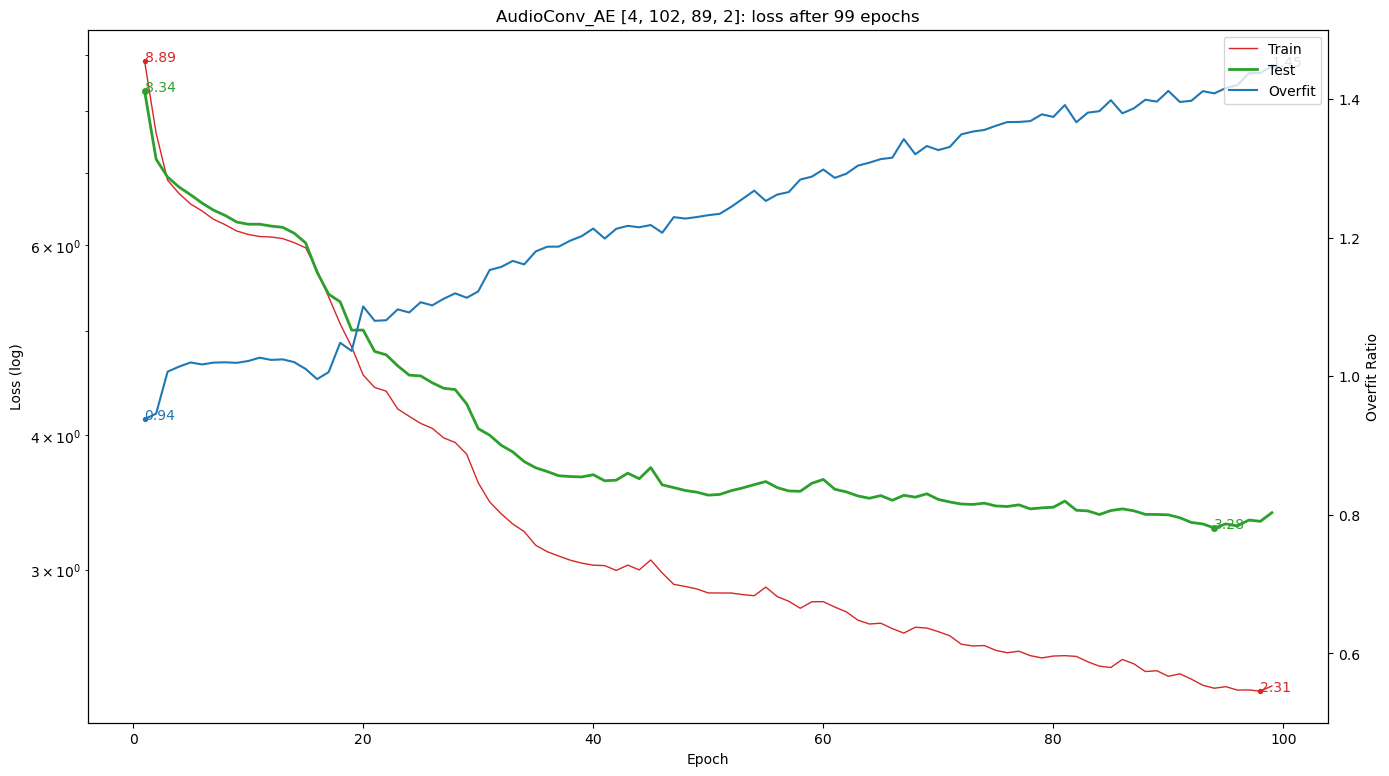

total=334.7 sec, epoch=100 (3.3 sec/epoch), train=2.34 (1.16%), test=3.32 (-0.09%), overfit=1.42
Model is overfitting: overfit=1.34 vs max=1.30
*** Finished Training after 100 epochs in 334.7 sec (3.35 sec/epoch), sample duration=2.0 sec, test loss=3.32, train loss=2.34, overfit=1.42
Train: final learning-rate=-0.40% (window=50)
Test: final learning-rate=-0.11% (window=50)
PlotVideoMaker: Hyper-Training, frames=1


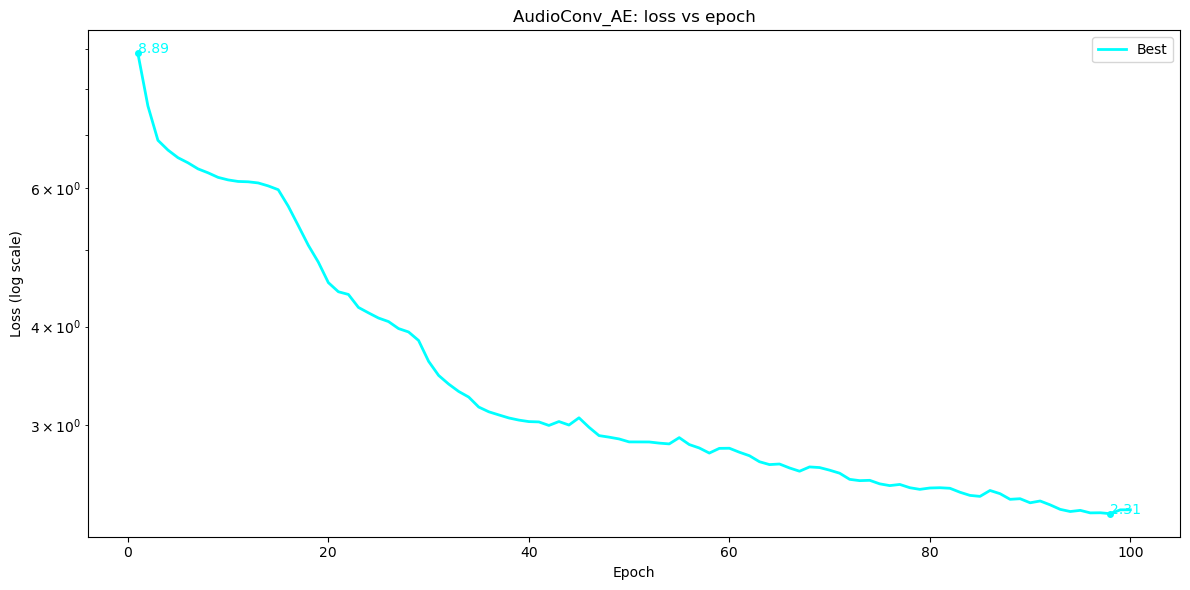

saving video Videos/Hyper-Training - AMqjDo-zS7mGCURQtmXx6w.gif, 1 frames = 3.0 sec @ 0.3 FPS


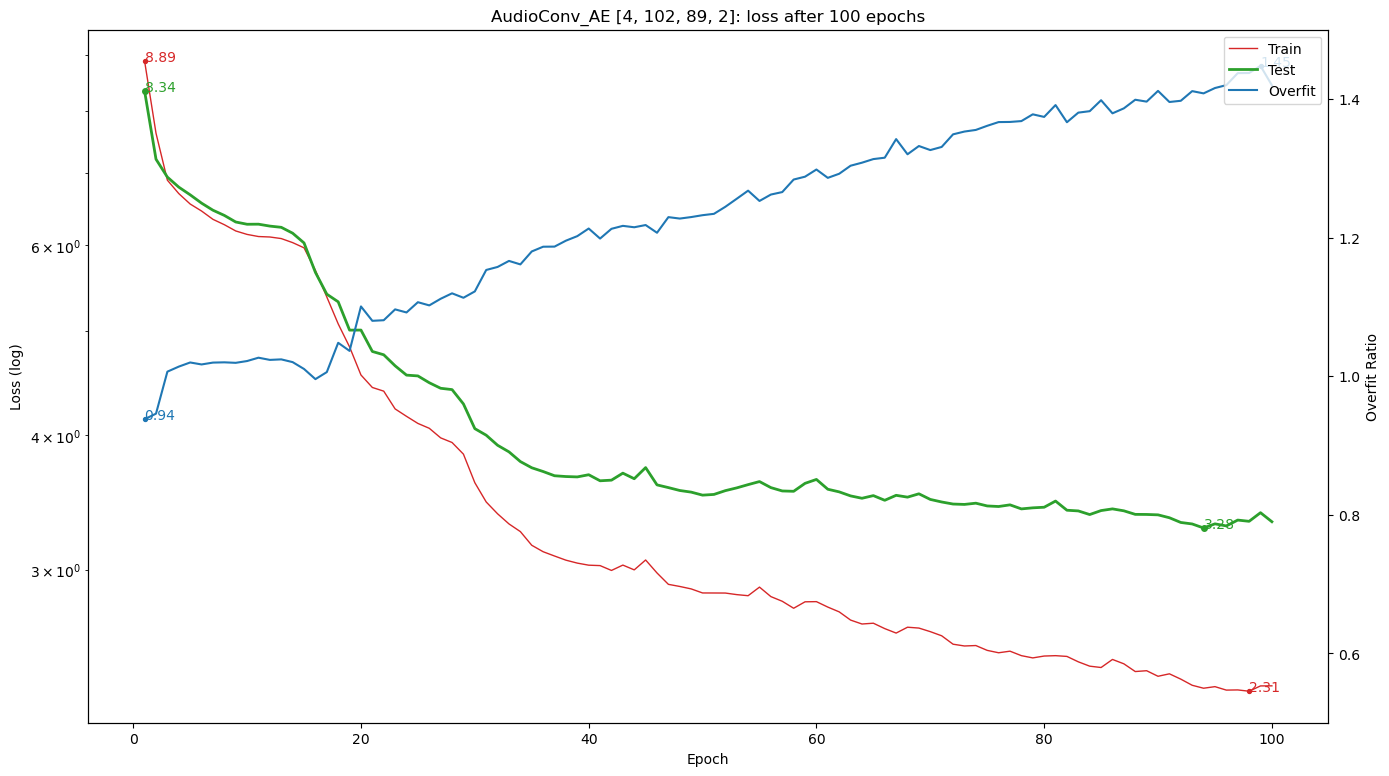

In [2]:
from HyperParameterTuning import *


#set_display_hiddens(True) # interesting but annoying

#hypertrain_AudioConv_VAE()
set_fail_loss(20_000)

#train_best_params("AudioConv_AE", [4, -5, 5, 42, 78, 235], None) # 525x compression, loss=2.75, overfit=1.2

#train_best_params("AudioConv_AE", [4, -5, 4, 84, 168, 4], None) # 1050x compression, test loss=4.07, train loss=2.90, overfit=1.40
train_best_params("AudioConv_AE", [4, -5, 4, 102, 89, 2], None) # 


#train_best_params("AudioConv_AE", [2, -4, 4, 40, 34, 30])
#train_best_params("AudioConv_AE", [3, -5, 6, 20, 100, 50])
#train_best_params("AudioConv_AE", [3, -5, 5, 33, 28, 28])

#train_best_params("AudioConv_VAE_Incremental", [2, -6, 9, 4, 1])
#train_best_params("AudioConv_VAE_Incremental", [2, -7, 12, 3, 10.0])

#hypertrain_AudioConv_VAE()

# from MakeSTFTs import *
# from Train import *
# from AudioUtils import *

# Load a demo sample, convert to STFT and back and play the sound.
#demo_stft("Samples/Piano C4 Major 13.wav", 2048, 2048*3//4)
#stop()



In [3]:
# Read all available samples and convert to STFTs
# This is performed automatically in the back-ground, but you can force it manually here with plots of the rejected audio files.
#make_STFTs(True)

#test_stft_conversions("Samples/Piano C4 Major 13 - 44.1 kHz.wav")
#stop()

In [4]:
# Find out the best hyper-parameters to train this model (typically needs to run overnight)
#model = "StepWiseMLP" # or "RNNAutoEncoder" and RNN_VAE_Incremental", or "StepWiseMLP" and "MLPVAE_Incremental"


#model = "RNNAutoEncoder"
#model = "RNN_VAE"
#model = "RNN_VAE_Incremental"

#model = "StepWiseMLP"
#model = "MLP_VAE"
#model = "MLPVAE_Incremental"

#model = "RNN_F&T"

#model = "STFT_VAE"

#model = "Conv2D_AE"
#model = "Conv2D_VAE_Incremental"

model = "AudioConv_AE"
#model = "AudioConv_VAE_Incremental"
#model = "AudioConv_VAE"

# First optimise the hyper-parameters for this model
#optimise_hyper_parameters(model)

# Then train using the best hyper-parameters
#train_best_params(model)


# Alternatively, refine the training for the best set of hyper-parameters we've found


AudioConv_AE: stored params=[4, -5, 4, 102, 89, 2]
AudioConv_AE layers=4, kernels=102, size=89, compression=2
	layer 1: kernel= 89, stride=44, length=2,003, compression=  44.0x
	layer 2: kernel= 44, stride=22, length=   90, compression=  22.3x
	layer 3: kernel= 22, stride=11, length=    7, compression=  12.9x
	layer 4: kernel=  7, stride= 3, length=    1, compression=   7.0x
	encoded shape=(102, 1), size=102
	decoded shape=(1, 86197), size=86197
AudioConv_AE 1,537,855 parameters, compression=864.7
AudioConv_AE(
  (encoder): Sequential(
    (0): Conv1d(1, 102, kernel_size=(89,), stride=(44,))
    (1): Conv1d(102, 102, kernel_size=(44,), stride=(22,))
    (2): Conv1d(102, 102, kernel_size=(22,), stride=(11,))
    (3): Conv1d(102, 102, kernel_size=(7,), stride=(3,))
    (4): Hardtanh(min_val=-1.0, max_val=1.0)
  )
  (decoder): Sequential(
    (0): ConvTranspose1d(102, 102, kernel_size=(7,), stride=(3,))
    (1): ConvTranspose1d(102, 102, kernel_size=(22,), stride=(11,))
    (2): ConvTrans

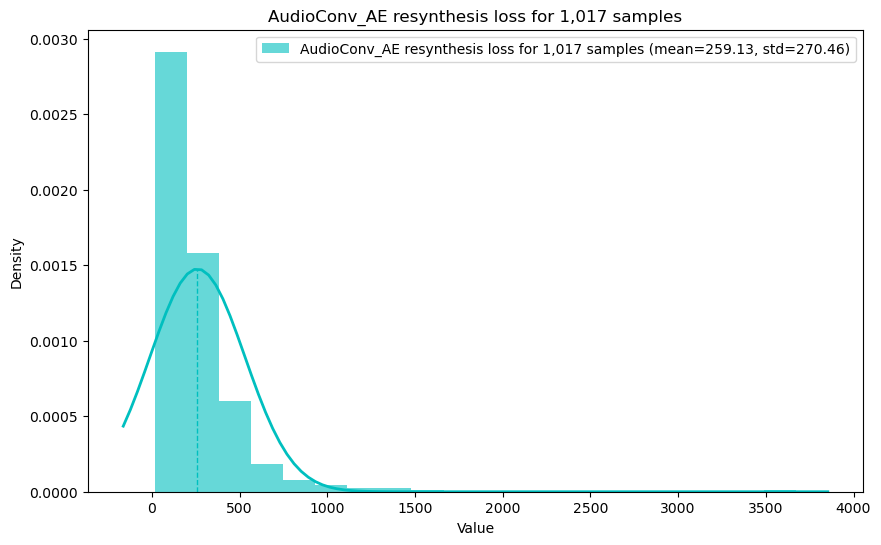

/Users/Richard/Coding/SampleGen/AudioUtils.py:75: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sr, data = wavfile.read(file_name)
/Users/Richard/Coding/SampleGen/AudioUtils.py:75: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sr, data = wavfile.read(file_name)


PlotVideoMaker: AudioConv_AE - variations, auto-save=False
Encoded EPiano Mrk II C3 to torch.Size([1, 102, 1])
Encoded EPiano Mrk II C3 to torch.Size([1, 102, 1])
Encoded EPiano Mrk II C3 to torch.Size([1, 102, 1])
Encoded EPiano Mrk II C3 to torch.Size([1, 102, 1])
Encoded EPiano Mrk II C3 to torch.Size([1, 102, 1])
Encoded EPiano Mrk II C3 to torch.Size([1, 102, 1])
Encoded High Granular Harmonic C3 to torch.Size([1, 102, 1])
Encoded High Granular Harmonic C3 to torch.Size([1, 102, 1])
Encoded High Granular Harmonic C3 to torch.Size([1, 102, 1])
Encoded High Granular Harmonic C3 to torch.Size([1, 102, 1])
Encoded High Granular Harmonic C3 to torch.Size([1, 102, 1])
Encoded High Granular Harmonic C3 to torch.Size([1, 102, 1])
Encoded Kawai-K11-Dulcimer-C4 to torch.Size([1, 102, 1])
Encoded Kawai-K11-Dulcimer-C4 to torch.Size([1, 102, 1])
Encoded Kawai-K11-Dulcimer-C4 to torch.Size([1, 102, 1])
Encoded Kawai-K11-Dulcimer-C4 to torch.Size([1, 102, 1])
Encoded Kawai-K11-Dulcimer-C4 to to

TypeError: only size-1 arrays can be converted to Python scalars

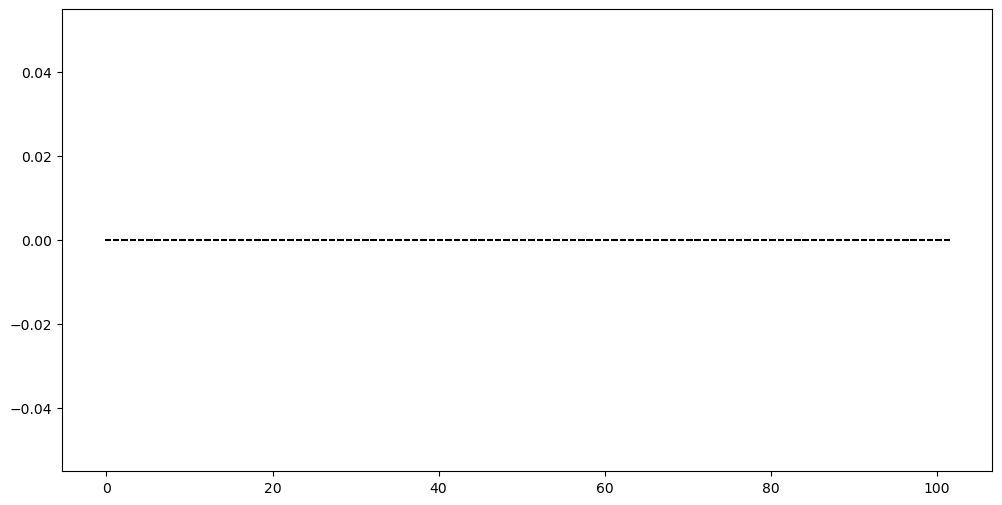

In [5]:
# Test and Generate new samples
from Generate import *

use_model(model)

# Print some pretty pictures of the samples and their encodings
#demo_encodings()

# Test the accuracy of the model: lists all samples by decreasing accuracy
test_all()

# Generate samples, interpolate, morph etc.
demo_sounds()


